In [1]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [11]:
import pandas as pd

FILE_ID = "20190908102514" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_runner.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [12]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),ジャイロ角速度生値(deg/sec),モーター角度生値(deg),ジャイロ推定角度(rad),ジャイロ推定角速度(rad/sec),モーター角度誤差(rad),モーター角速度誤差(rad/sec),モーター角度誤差累積値(rad??),モーターデューティー比左,モーターデューティー比右,モーター電圧生値,推定最大入力可能電圧左,推定最大入力可能電圧右,モーター印加電圧比左,モーター印加電圧比右
0,0,0.020532,0.000000,0.020406,69,0.5,0.021680,1.204452,0.008727,0.387851,0.000157,61.100170,67.694158,7819533,8.742019,7.890471,61.100170,67.694158
1,1,0.037154,0.016622,0.012435,15,0.5,0.026395,0.261946,0.030407,0.963561,0.000704,36.672006,40.641728,7531066,8.396464,7.576331,36.672006,40.641728
2,2,0.052372,0.015218,0.012522,-40,10.5,0.013831,-0.697992,0.209655,7.966575,0.004478,26.446459,29.302312,7760333,8.671103,7.826003,26.446459,29.302312
3,3,0.068624,0.016252,0.012746,-8,23.0,0.011321,-0.139470,0.415257,9.137880,0.011953,51.612661,57.184058,7796400,8.714308,7.865280,51.612661,57.184058
4,4,0.083572,0.014948,0.012298,-12,32.5,0.007554,-0.209280,0.578553,7.257592,0.022367,39.960472,44.277548,7717866,8.620232,7.779756,39.960472,44.277548
5,5,0.097568,0.013996,0.011390,-36,43.5,-0.003753,-0.628154,0.766772,8.365297,0.036169,23.354541,25.875818,7787066,8.703126,7.855115,23.354541,25.875818
6,6,0.112051,0.014483,0.011742,-44,53.5,-0.017573,-0.767765,0.929998,7.254496,0.052909,4.247849,4.706232,7830200,8.754797,7.902088,4.247849,4.706232
7,7,0.126964,0.014913,0.011772,-24,63.0,-0.025109,-0.418681,1.081985,6.754956,0.072384,9.911398,10.980740,7847866,8.775959,7.921326,9.911398,10.980740
8,8,0.142445,0.015481,0.012528,14,69.0,-0.020707,0.244553,1.179168,4.319266,0.093609,26.527324,29.389349,7848200,8.776359,7.921690,26.527324,29.389349
9,9,0.158277,0.015832,0.012768,27,72.0,-0.012221,0.471441,1.235930,2.522748,0.115856,34.049910,37.725123,7805733,8.725488,7.875443,34.049910,37.725123


In [13]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    xticks = np.arange(start, time_max, 0.1)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

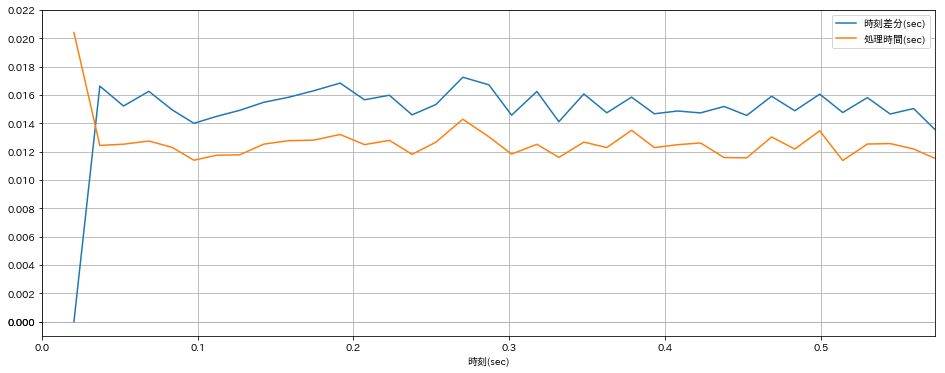

In [14]:
# =======================================================
# 処理時間と時刻差分のグラフの出力

columns_deg = [
    '時刻差分(sec)',
    '処理時間(sec)',
]
show_plot(df, columns_deg, 0.002, figsize=(16,6))

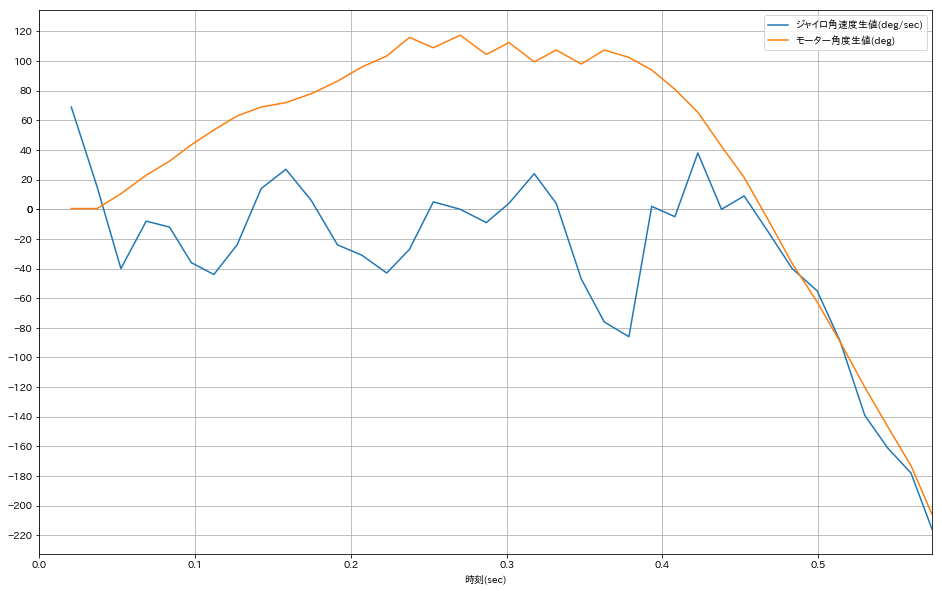

In [15]:
# =======================================================
# ジャイロ角速度生値(deg/sec) と モーター角度生値(deg) のグラフの出力

columns_deg = [
    'ジャイロ角速度生値(deg/sec)',
    'モーター角度生値(deg)',
]
show_plot(df, columns_deg, 20, figsize=(16,10))

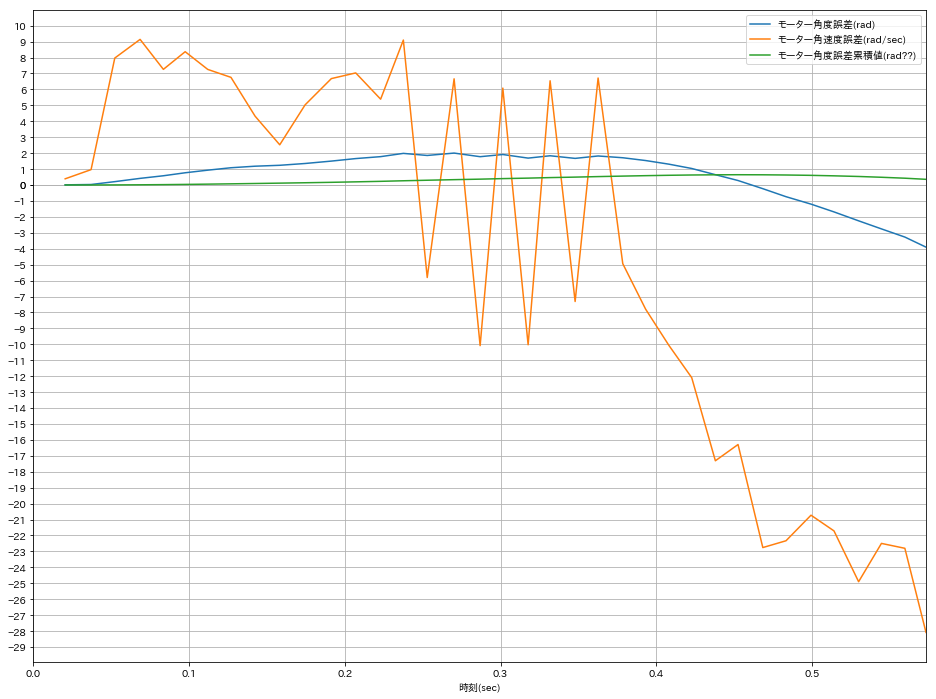

In [16]:
# =======================================================
# 各種モーター角度・誤差のグラフ出力

columns_rad = [
    'モーター角度誤差(rad)',
    'モーター角速度誤差(rad/sec)',
    'モーター角度誤差累積値(rad??)'
]
show_plot(df, columns_rad, 1, figsize=(16,12))

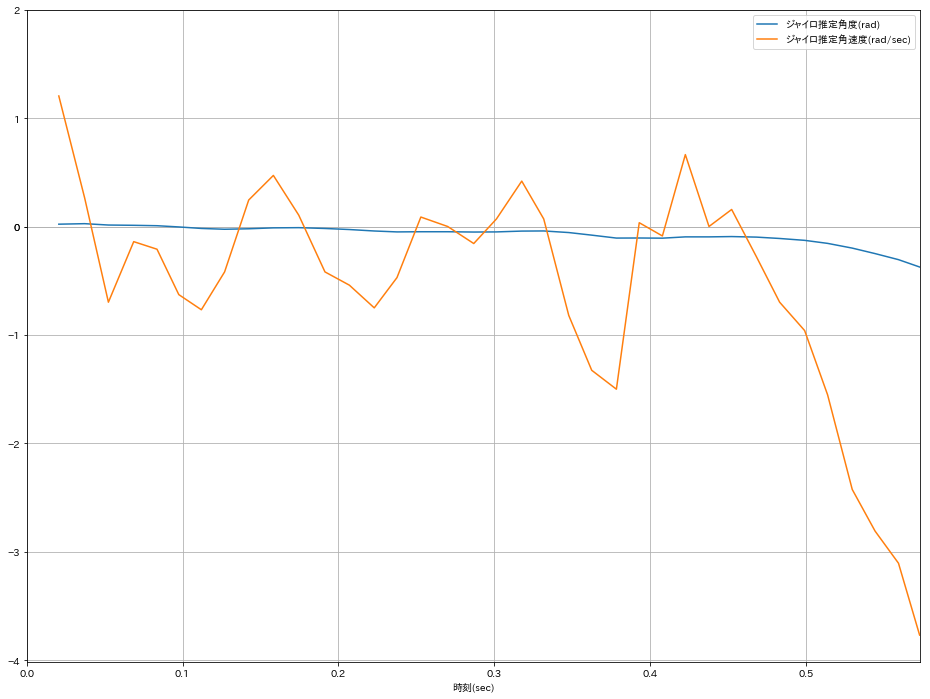

In [17]:
# =======================================================
# 各種ジャイロ推定角度・誤差のグラフ出力

columns_rad = [
    'ジャイロ推定角度(rad)',
    'ジャイロ推定角速度(rad/sec)',
]
show_plot(df, columns_rad, 1, figsize=(16,12))

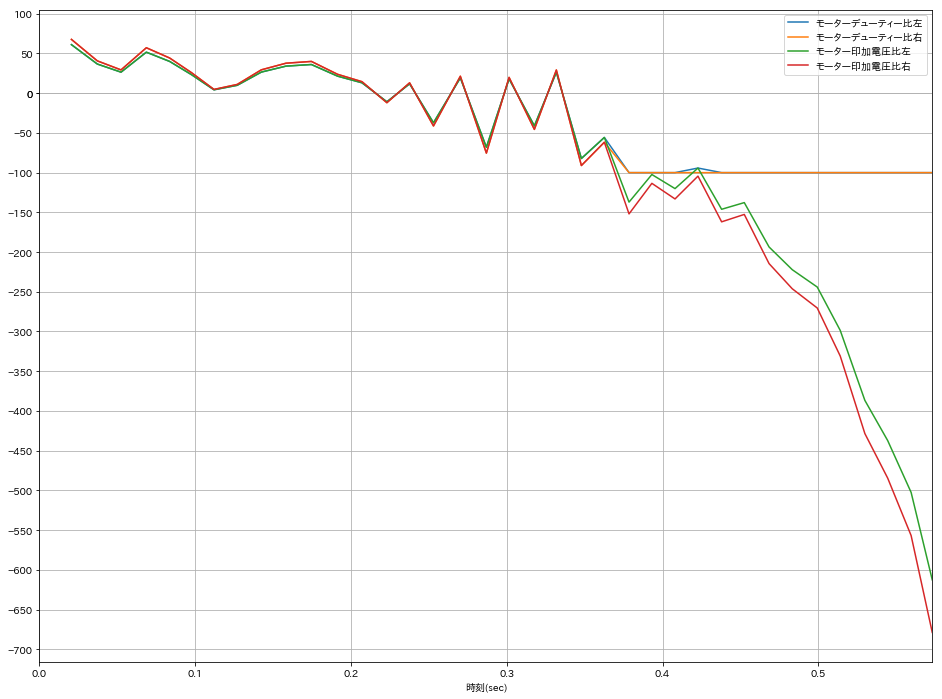

In [18]:
# =======================================================
# 印加電圧比のグラフ出力

columns_vol = [
    'モーターデューティー比左',
    'モーターデューティー比右',
    'モーター印加電圧比左',
    'モーター印加電圧比右'
]
show_plot(df, columns_vol, 50, figsize=(16,12)) #, start=0.1, end=0.3)

In [19]:
import matplotlib as mpl
mpl.matplotlib_fname()
mpl.get_configdir()

'/home/yoshinori/.config/matplotlib'